# A group project

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Select a PATH pointing to your working directory - where your datasets are saved

In [2]:
PATH = './data'

Then use the \<os> module to change your current (default) working directory to PATH, your new working directory

In [3]:
os.chdir(PATH)

**Import the \<California_Houses.csv> dataset from your working directory**

In [4]:
df = pd.read_csv('California_Houses.csv')

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [5]:
df.head(5)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

In [6]:
df.tail(5)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575

In [7]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

*Hint : you may wish to associate the name of each city to the smallest distance among the four cities*

Save the transformed dataset as "housing"

In [8]:
def find_nearest_destination(row):
    distances = row[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
    nearest_destination = distances.idxmin()
    return nearest_destination

df['Closest_city'] = df.apply(find_nearest_destination, axis=1)
df['Closest_city'] = df['Closest_city'].str.replace('Distance_to_', '')

# df['Closest_city'].unique()

df.drop(columns = ['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace = True)

In [9]:
houses_df = df.copy(deep = True)

**Display the summary of your new dataframe**

In [10]:
display(houses_df.describe())

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  
count       20640.000000  
mean        40509.264883  
std         49140.039160  
min           120.676447  
25%          9079.756762  
50%         20522.019101  
75%         49830.414479  
max        333804.686371

In [14]:
display(houses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
 9   Distance_to_coast   20640 non-null  float64
 10  Closest_city        20640 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


None

# Part 1 - Data explorations

### What do you notice? 

- which attributes are quantitative ?
- which attributes are not quantitative? and what are their types?

`Quantitative` : Median_House_Value, Median_Income, Median_Age, Tot_Rooms, Tot_Bedrooms, Population, Households, Latitude, Longitude, Distance_to_coast

`Categorical` : Closest_city

### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [11]:
houses_df['Closest_city'] = houses_df['Closest_city'].astype('category')

In [12]:
houses_df['Closest_city'].value_counts()

LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: Closest_city, dtype: int64

### Show a summary of the quantitative attributes
**Use tables and plots**

In [13]:
numerical_columns = houses_df.select_dtypes(include=['number'])
non_numerical_columns = houses_df.select_dtypes(exclude=['number'])

In [14]:
numerical_columns.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  
count       20640.000000  
mean        40509.264883  
std         49140.039160  
min           120.676447  
25%          9079.756762  
50%         20522.019101  
75%         49830.414479  
max        333804.686371

In [15]:
def hist_box(col, bins):
    
    fig, ax = plt.subplots(1,2, figsize = (8,4), facecolor='white', dpi=100)
    
    #ax1
    sns.histplot(data=col, kde=True, bins=bins, color='skyblue', edgecolor='black', ax=ax[0])
    ax[0].set_title(f'Histogramme of {col.name}')
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel('Count')
    
    #ax2
    sns.boxplot(data = col, color='skyblue', ax=ax[1])
    # boxplot = ax[1].boxplot(col, vert=True, patch_artist=True, boxprops={'facecolor': 'lightcoral'})
    #Find outliers
    # outliers = [flier.get_ydata() for flier in boxplot['fliers']]
    # for outlier in outliers:
    #     for value in outlier:
    #         ax[1].annotate(str(value), (1, value), textcoords='offset points', xytext=(10, 0), va='center', fontsize=8, color='red')
    ax[1].set_title(f'Boxplot of {col.name}')
    ax[1].set_xlabel(col.name.upper())
    
    plt.tight_layout()
    plt.show()

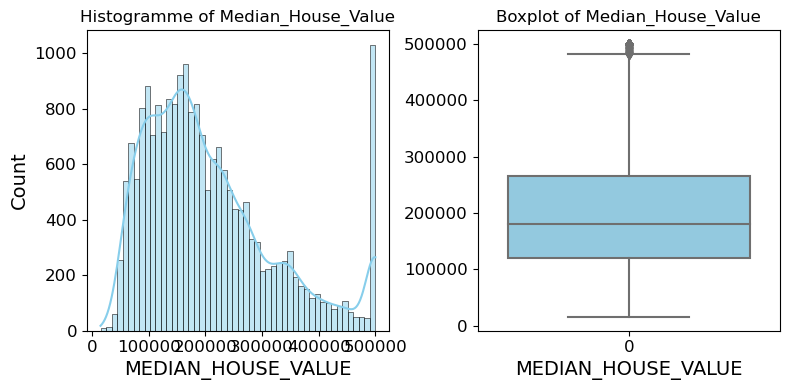

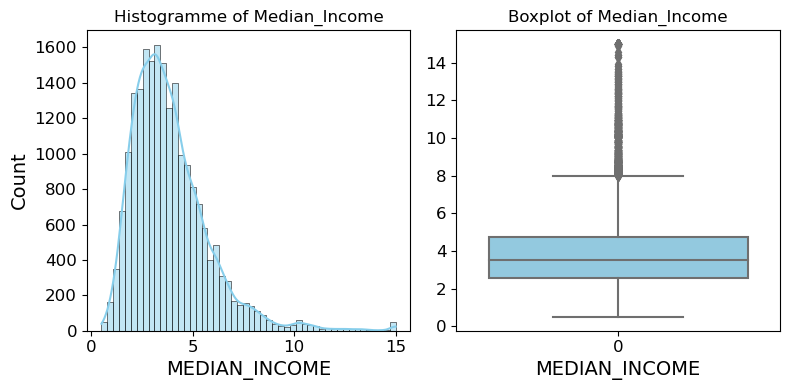

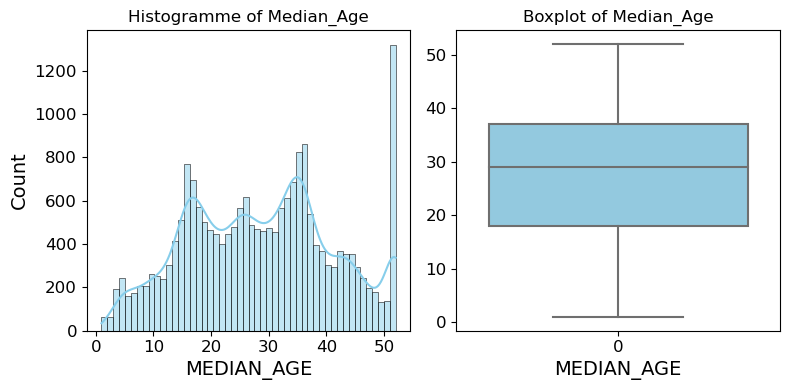

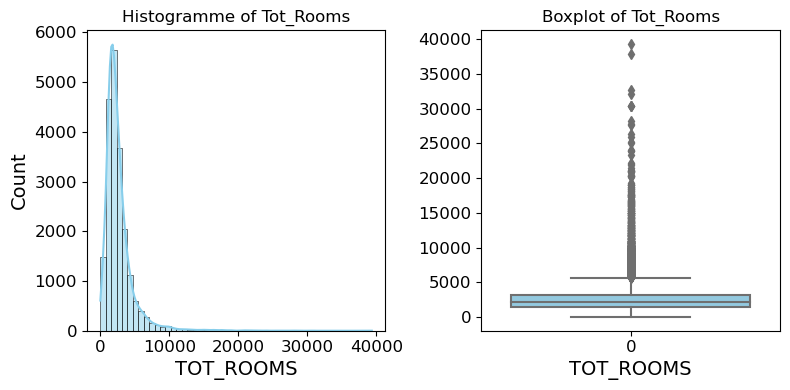

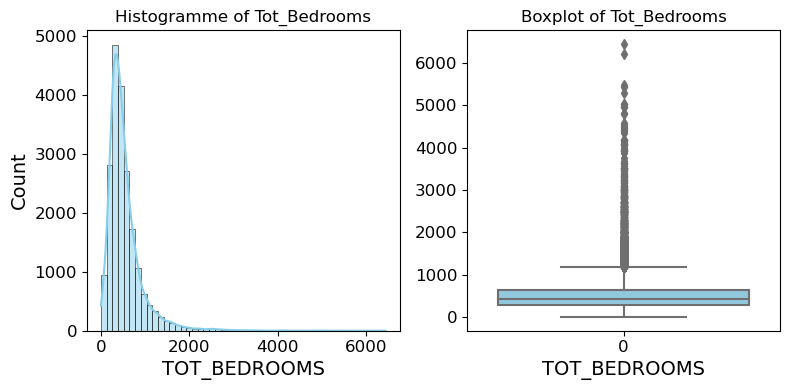

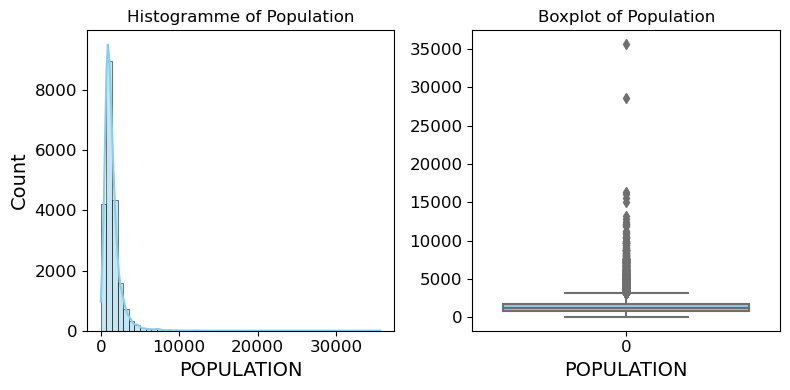

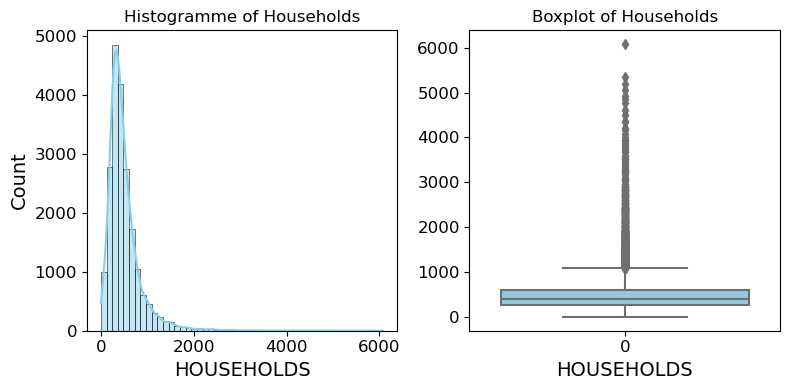

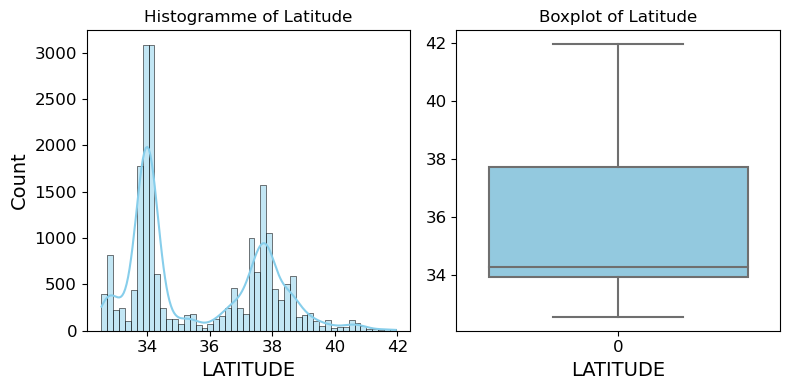

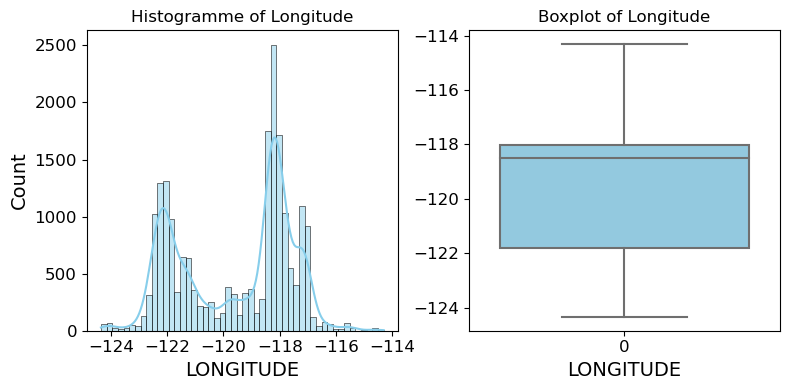

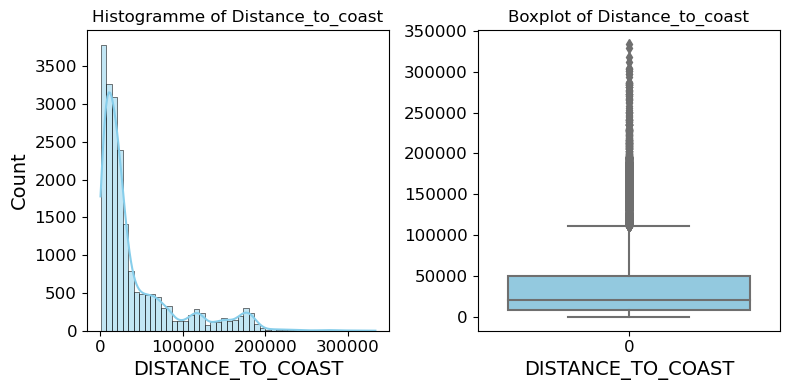

In [16]:
for i in numerical_columns.columns:
    hist_box(houses_df[i], bins = 50)

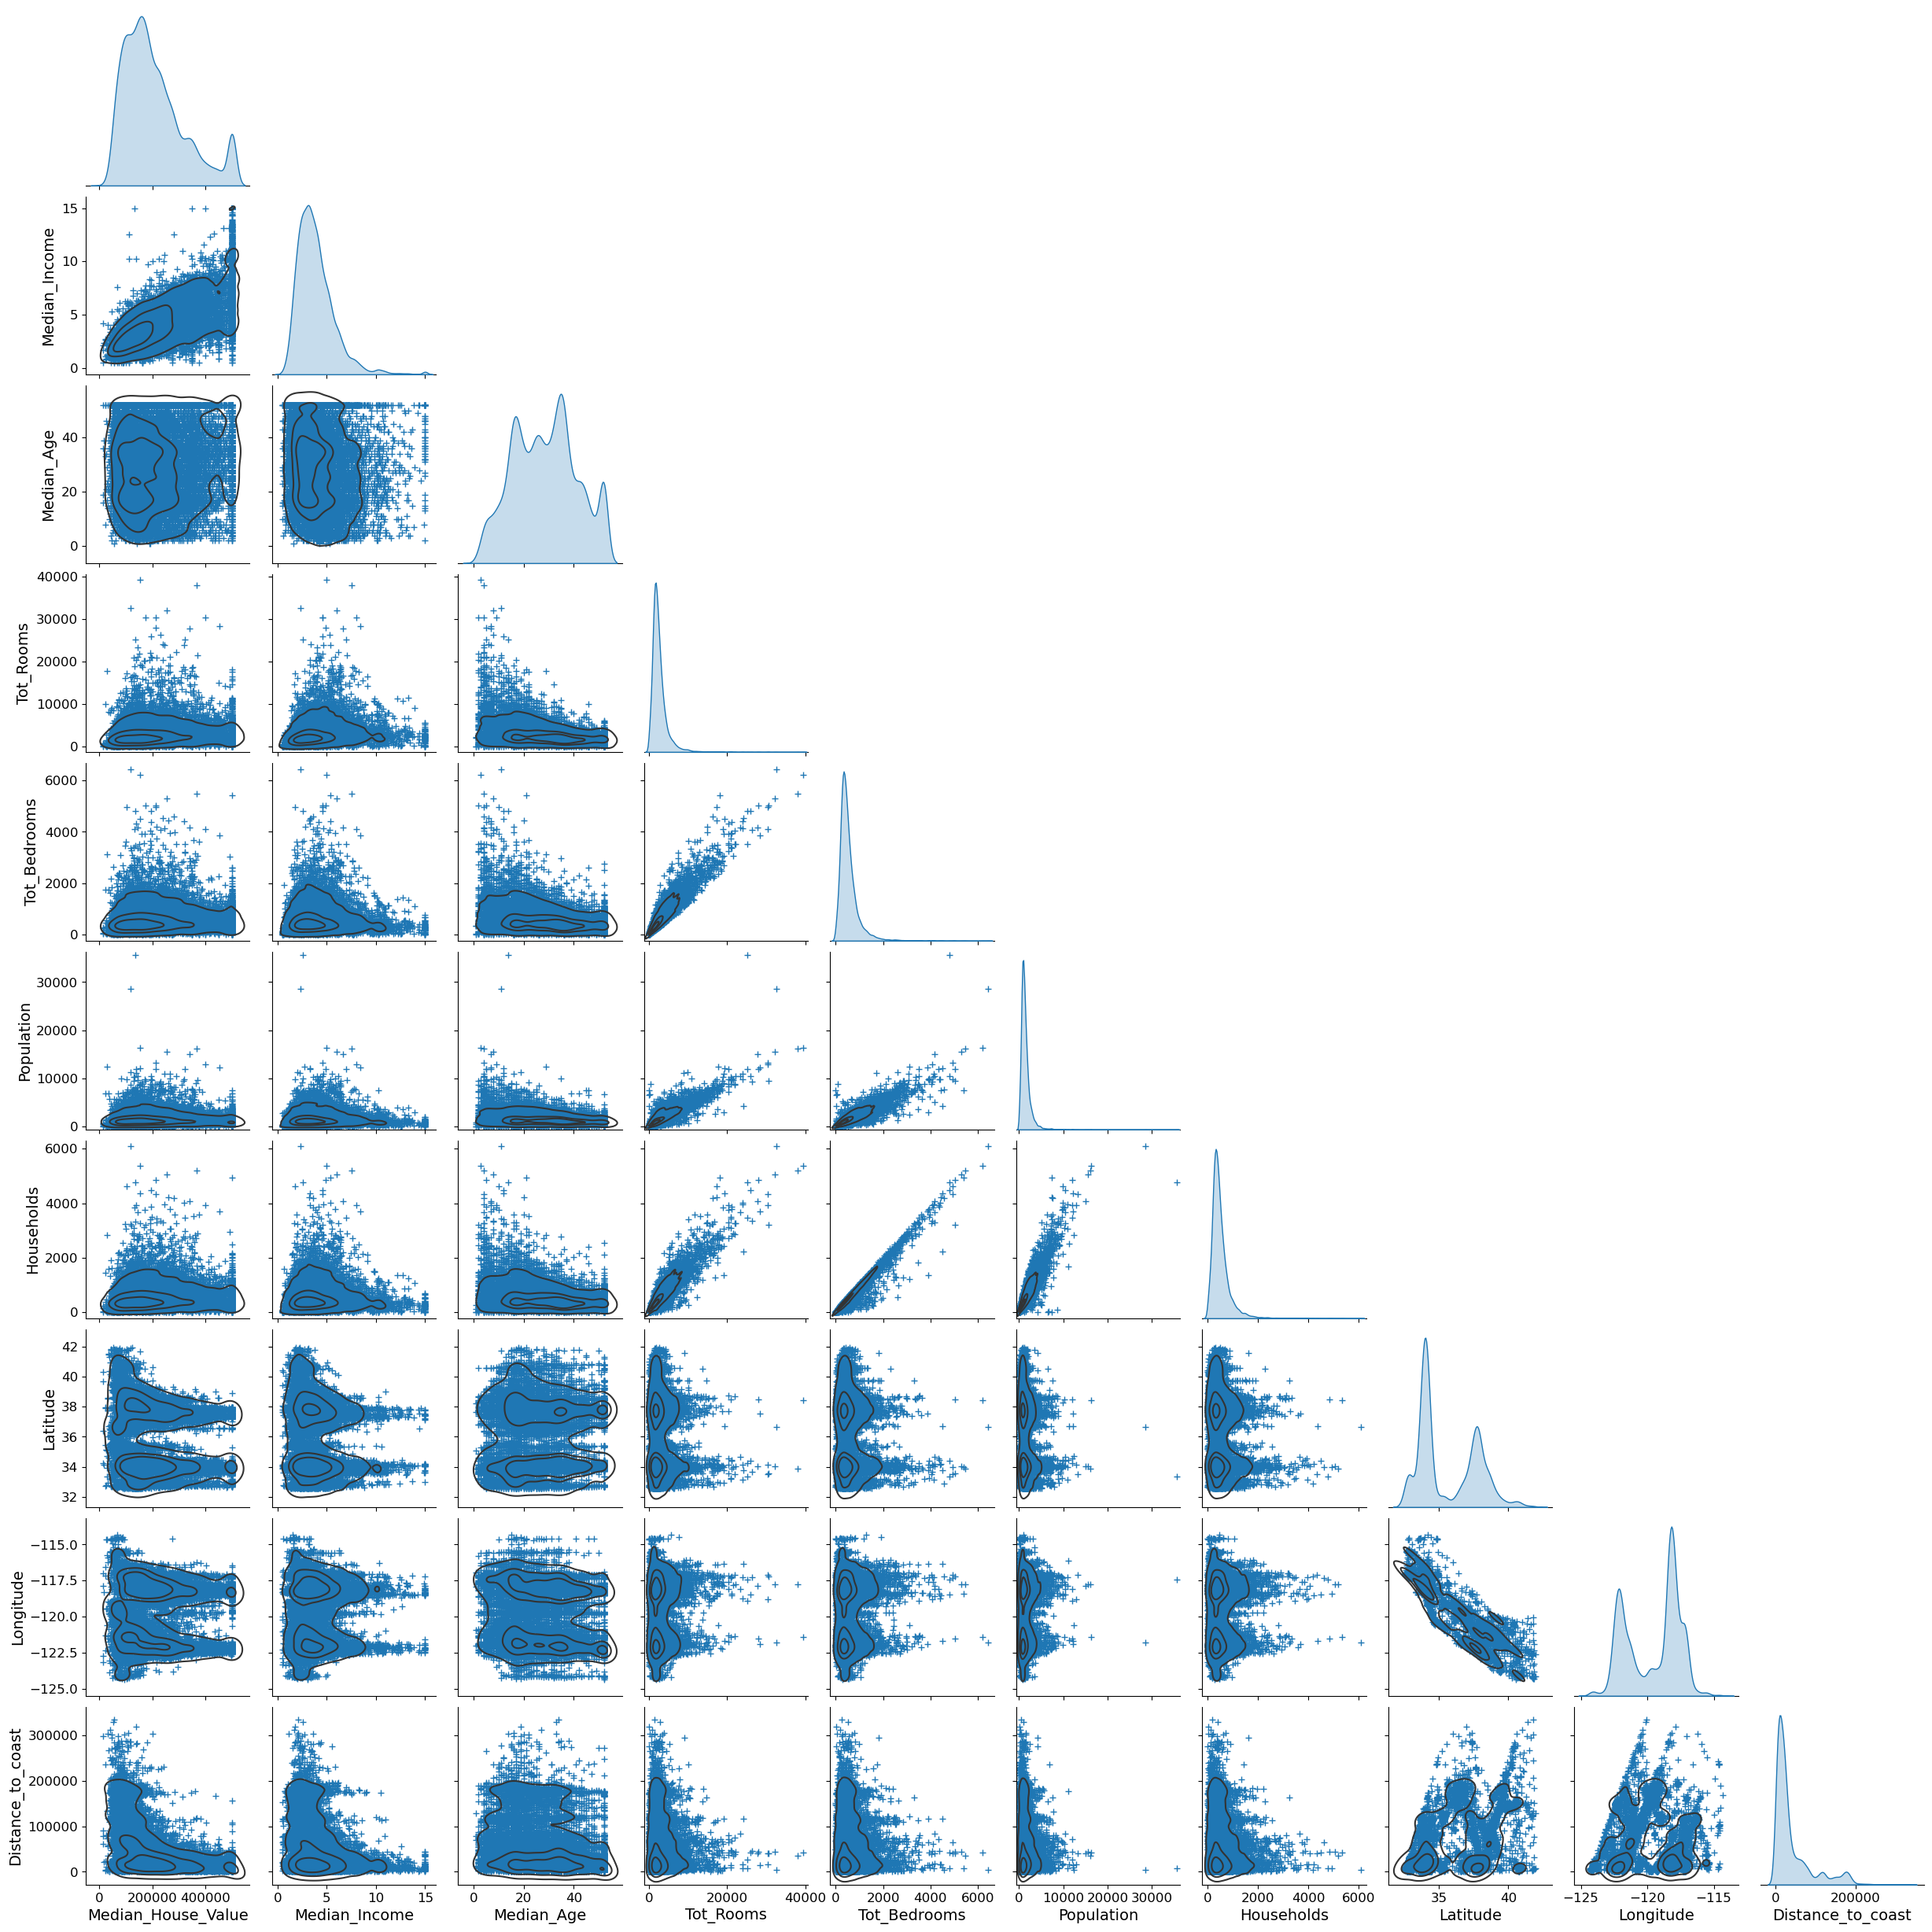

In [17]:
g = sns.pairplot(
    numerical_columns, 
    plot_kws=dict(marker="+", linewidth=1),
    diag_kind= 'kde',
    corner=True,
)
g.map_lower(sns.kdeplot, levels = 4, color = ".2")

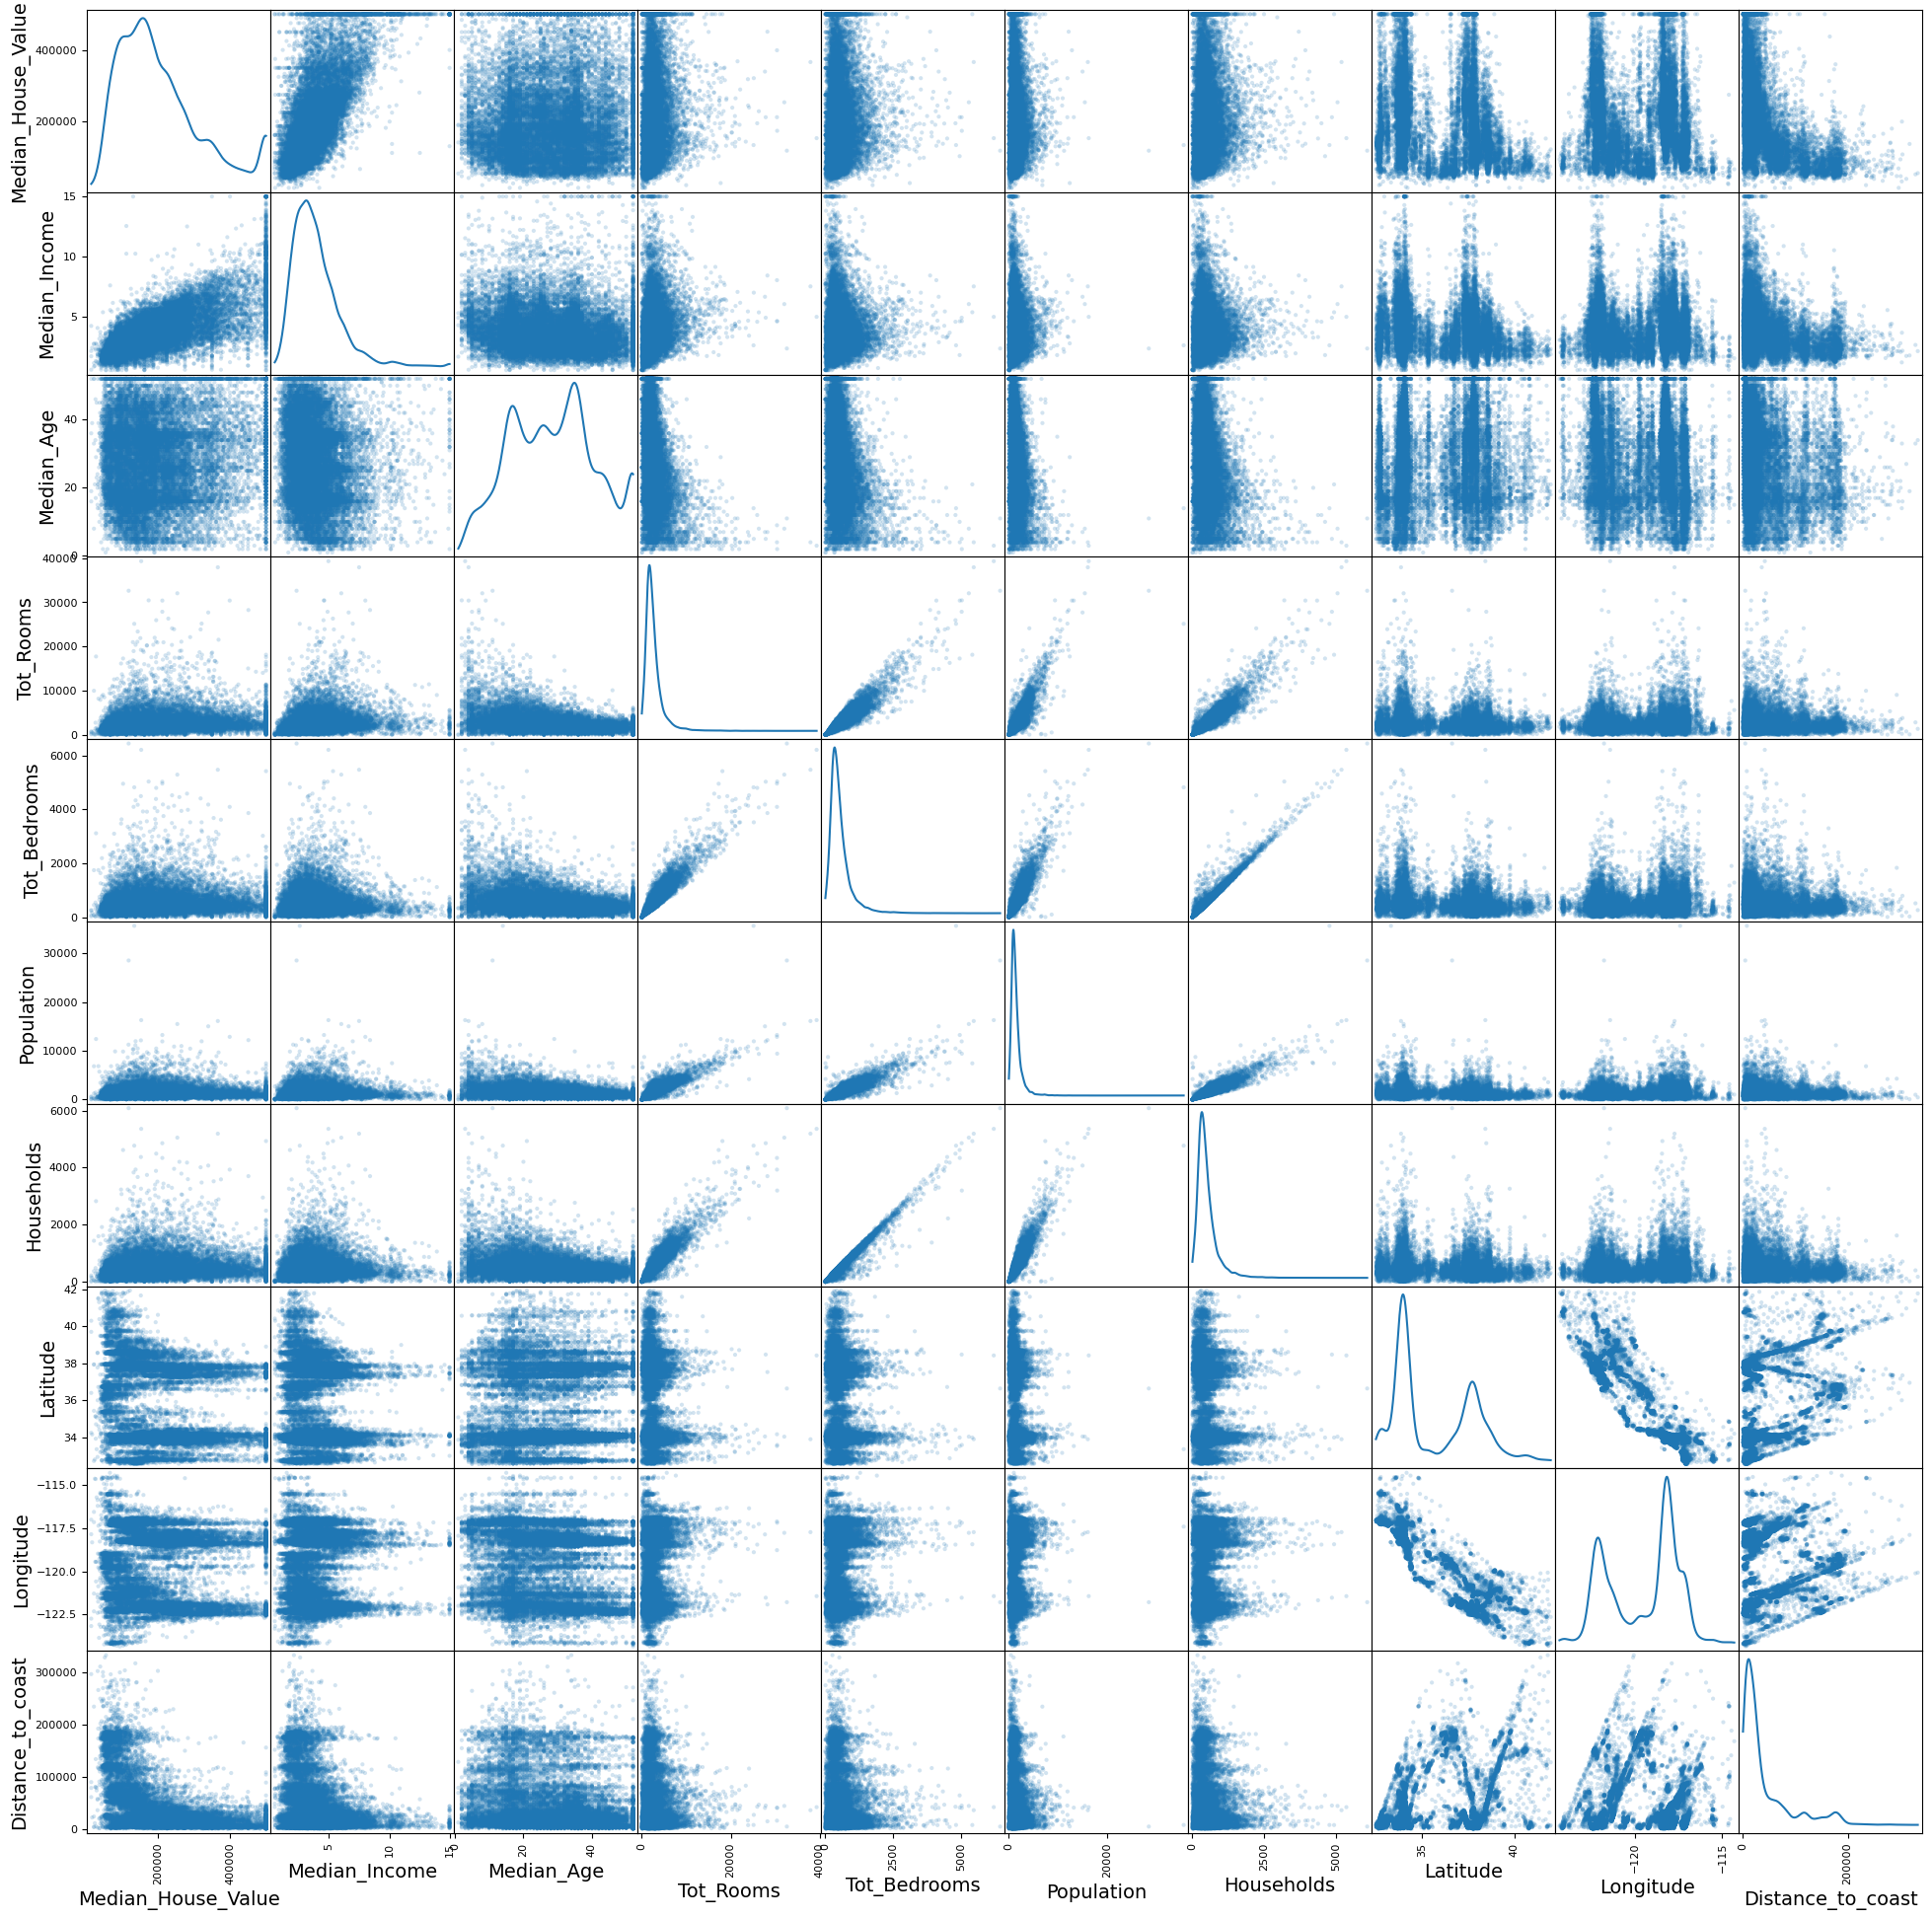

In [18]:
pd.plotting.scatter_matrix(numerical_columns, alpha = 0.2, figsize = (24, 24), diagonal='kde');

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Look more carefully into the distribution of the "median_income" column
Hint : you may wish to change the \<bins> parameter

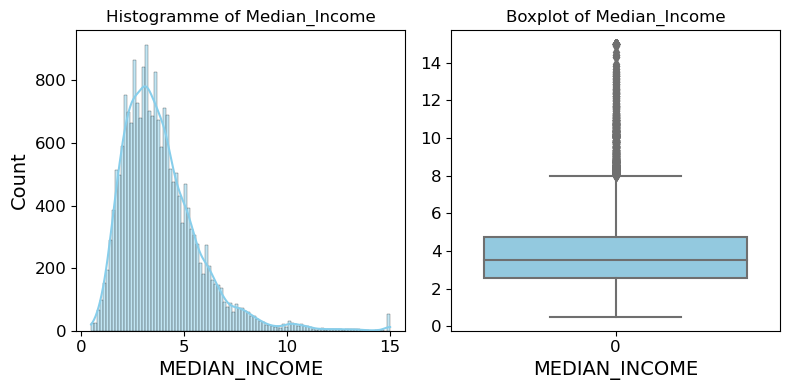

In [21]:
## Your code here ##
hist_box(houses_df['Median_Income'], 100)

<Axes: xlabel='Median_Income', ylabel='Count'>

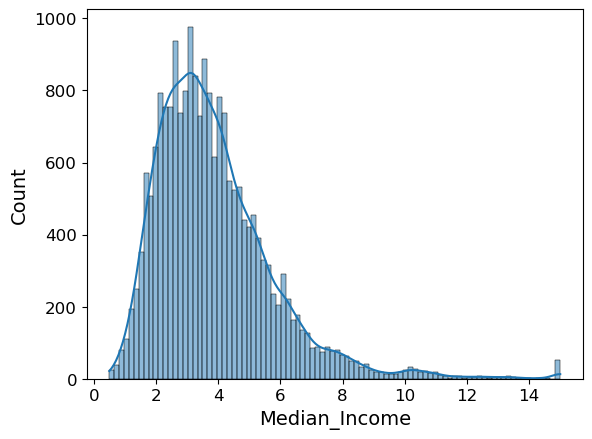

In [22]:
sns.histplot(houses_df['Median_Income'], kde = True)

In [23]:
## Your code for a boxplot here ##
houses_df.loc[houses_df['Median_Income'] > 14].describe()

Median_House_Value  Median_Income  Median_Age    Tot_Rooms  \
count           57.000000       57.00000   57.000000    57.000000   
mean        489146.561404       14.94570   38.631579  2195.842105   
std          53739.659085        0.17427   12.945810  1413.593860   
min         131300.000000       14.28670    2.000000     8.000000   
25%         500001.000000       15.00010   32.000000  1371.000000   
50%         500001.000000       15.00010   40.000000  2209.000000   
75%         500001.000000       15.00010   52.000000  2907.000000   
max         500001.000000       15.00010   52.000000  5586.000000   

       Tot_Bedrooms   Population  Households   Latitude  Longitude  \
count     57.000000    57.000000   57.000000  57.000000   57.00000   
mean     264.122807   733.298246  251.526316  35.160526 -119.57193   
std      175.377152   459.520751  166.136143   1.665089    1.87612   
min        1.000000    13.000000    1.000000  32.990000 -122.52000   
25%      148.000000   414.000000  152.000000  34.070000 -121.96000   
50%      261.000000   735.000000  247.000000  34.100000 -118.42000   
75%      360.000000   956.000000  319.000000  37.400000 -118.33000   
max      753.000000  1871.000000  697.000000  37.920000 -117.23000   

       Distance_to_coast  
count          57.000000  
mean        13933.404904  
std         11473.009014  
min          1016.672627  
25%          6042.888272  
50%         10620.894804  
75%         17257.043241  
max         43658.403542

In [24]:
houses_df.loc[houses_df['Median_House_Value'] > 499999].describe()

Median_House_Value  Median_Income  Median_Age     Tot_Rooms  \
count          992.000000     992.000000  992.000000    992.000000   
mean        500000.972782       7.718279   33.916331   2941.285282   
std              0.162799       3.270615   13.031440   2144.906809   
min         500000.000000       0.499900    2.000000      8.000000   
25%         500001.000000       5.112825   25.000000   1662.500000   
50%         500001.000000       7.562450   34.000000   2501.000000   
75%         500001.000000      10.074725   45.000000   3532.750000   
max         500001.000000      15.000100   52.000000  18132.000000   

       Tot_Bedrooms   Population   Households    Latitude   Longitude  \
count    992.000000   992.000000   992.000000  992.000000  992.000000   
mean     503.134073  1110.717742   466.803427   35.235514 -119.714808   
std      395.642378   809.597160   359.277806    1.789526    1.954213   
min        1.000000    13.000000     1.000000   32.680000 -122.640000   
25%      268.750000   635.750000   253.000000   33.977500 -122.120000   
50%      403.500000   925.500000   375.000000   34.130000 -118.480000   
75%      610.500000  1338.750000   577.000000   37.402500 -118.320000   
max     5419.000000  7431.000000  4930.000000   38.910000 -116.430000   

       Distance_to_coast  
count         992.000000  
mean        11622.834202  
std         12189.661020  
min           421.084024  
25%          3922.475382  
50%          7903.433892  
75%         14901.749492  
max        156238.970441

In [25]:
np.median(houses_df['Median_Income'])

3.5347999999999997

In [26]:
np.median(houses_df.loc[houses_df['Median_Income'] > 11, 'Median_Income'])

13.014700000000001

### Explain the following lines of code

### *``Your answers here``*

In [27]:
cat=[np.min(houses_df["Median_Income"])]
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(houses_df["Median_Income"].quantile(i))
cat.append(np.max(houses_df["Median_Income"]))
print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


In [28]:
houses_df["income_cat"]=pd.cut(houses_df["Median_Income"], bins=cat, labels = [1,2,3,4,5], include_lowest=True)

In [29]:
houses_df

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Closest_city income_cat  
0      SanFrancisco          5  
1      SanFrancisco          5  
2      SanFrancisco          5  
3      SanFrancisco          5  
4      SanFrancisco          3  
...             ...        ...  
20635  SanFrancisco          1  
20636  SanFrancisco          2  
20637  SanFrancisco          1  
20638  SanFrancisco          1  
20639  SanFrancisco          2  

[20640 rows x 12 columns]

In [30]:
houses_df["income_cat"].value_counts()

2    4131
1    4130
4    4128
5    4128
3    4123
Name: income_cat, dtype: int64

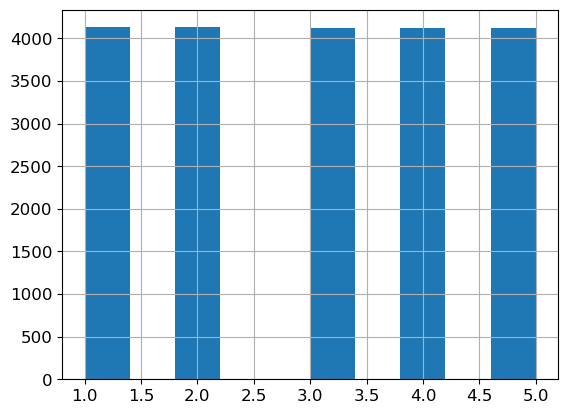

In [31]:
houses_df["income_cat"].hist();

In [32]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  category
 11  income_cat          20640 non-null  category
dtypes: category(2), float64(5), int64(5)
memory usage: 1.6 MB


### Create a Test Set through stratified random sampling on the income variable

**Why a test set ?** <br>
**Why stratify the data on the income variable before generating a test set ?** <br>
Hint : use a seed = 42 for the reproductibility of the (re)samplings

### *``Your answers here``*

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_y = houses_df['Median_House_Value']
# df_X = houhouses_df.drop(columns='Median_House_Value')

In [35]:
train_strat, test_strat = train_test_split(houses_df, test_size=0.001, random_state=42, stratify=df_y)
## Your code here ##

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Now generate an equivalent random split without stratification

In [37]:
train_random, test_random = train_test_split(houses_df, test_size=0.2, random_state=42, stratify=None)

#### Explain precisely what each of the two following cells do.

### *``Your answers here``*

In [38]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(houses_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(houses_df),
    "Stratified": income_cat_proportions(test_strat),
    "Random": income_cat_proportions(test_random),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

NameError: name 'test_strat' is not defined

In [ ]:
compare_props

**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [ ]:
## Your code here ##

### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

In [39]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  category
 11  income_cat          20640 non-null  category
dtypes: category(2), float64(5), int64(5)
memory usage: 1.6 MB


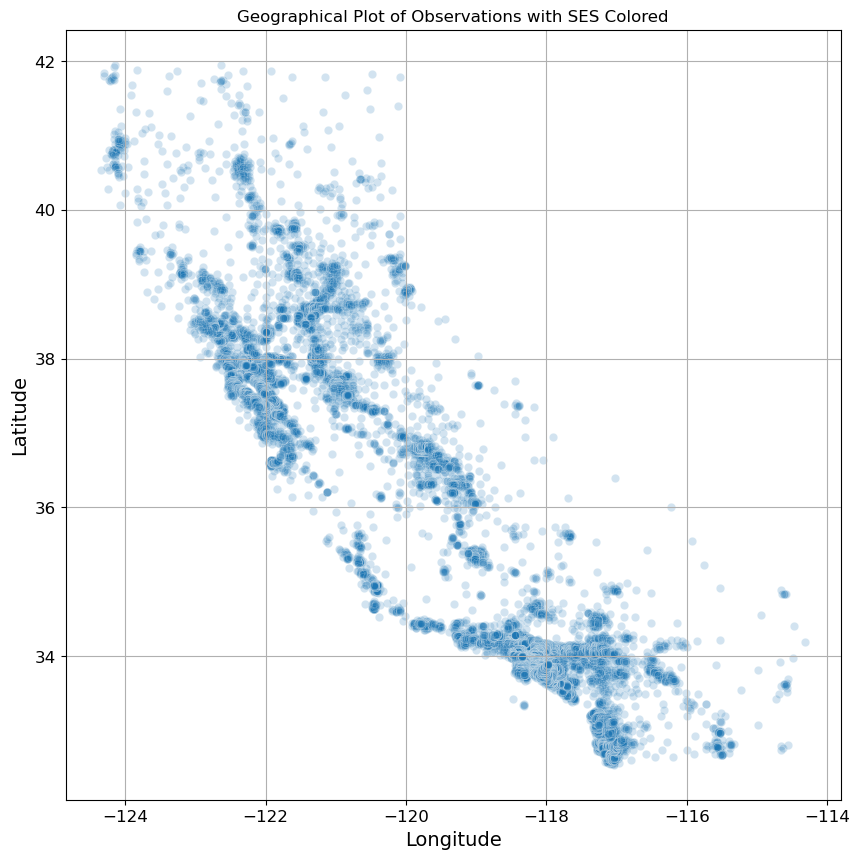

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=houses_df, x='Longitude', y='Latitude', alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Observations with SES Colored')
plt.grid(True)
plt.show()


### Geographic map of California houses values per district with population density

**Try to understand and comment on the following code**

### *``Your comments here``*

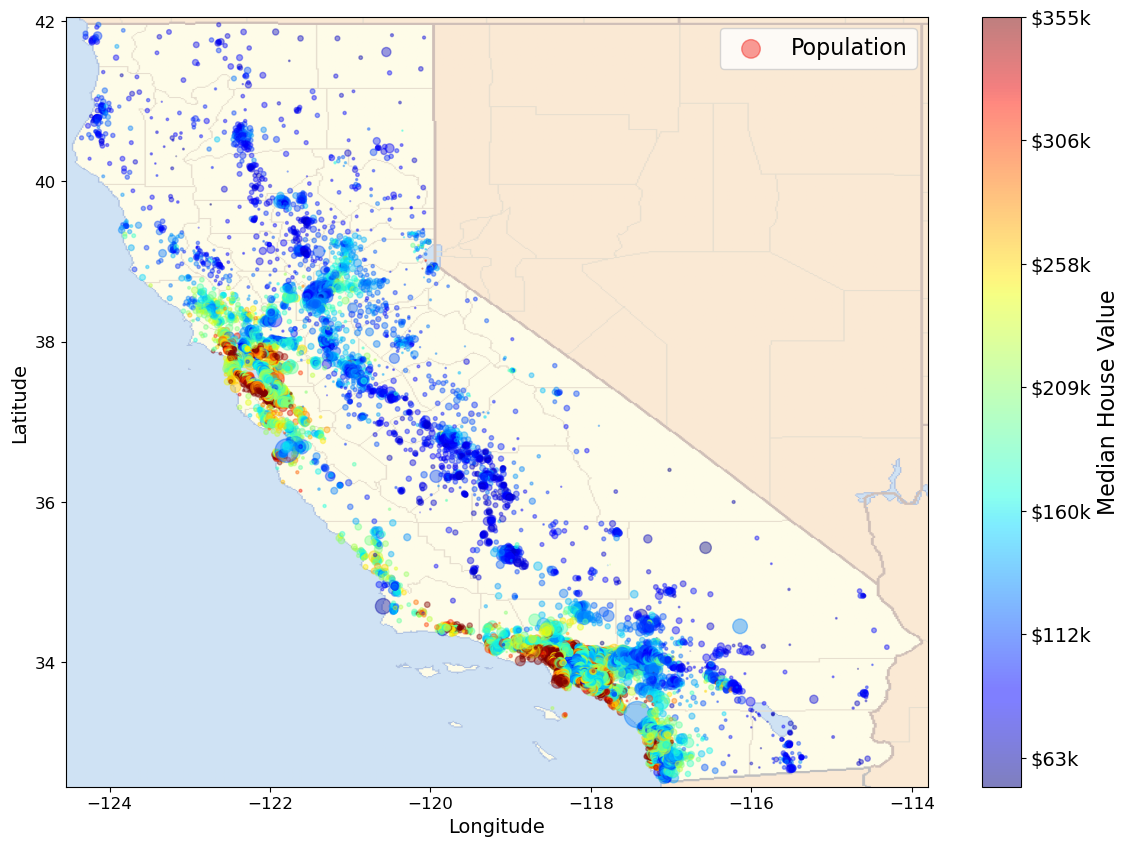

In [41]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
california_img=mpimg.imread("../california.png")
ax = houses_df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(14,10),
                       s=houses_df['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"),colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses_df["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Bivariate Analysis

**How are the different variables related to each other two by two ?**

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

In [42]:
houses_cor = houses_df.corr()

Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

<Axes: >

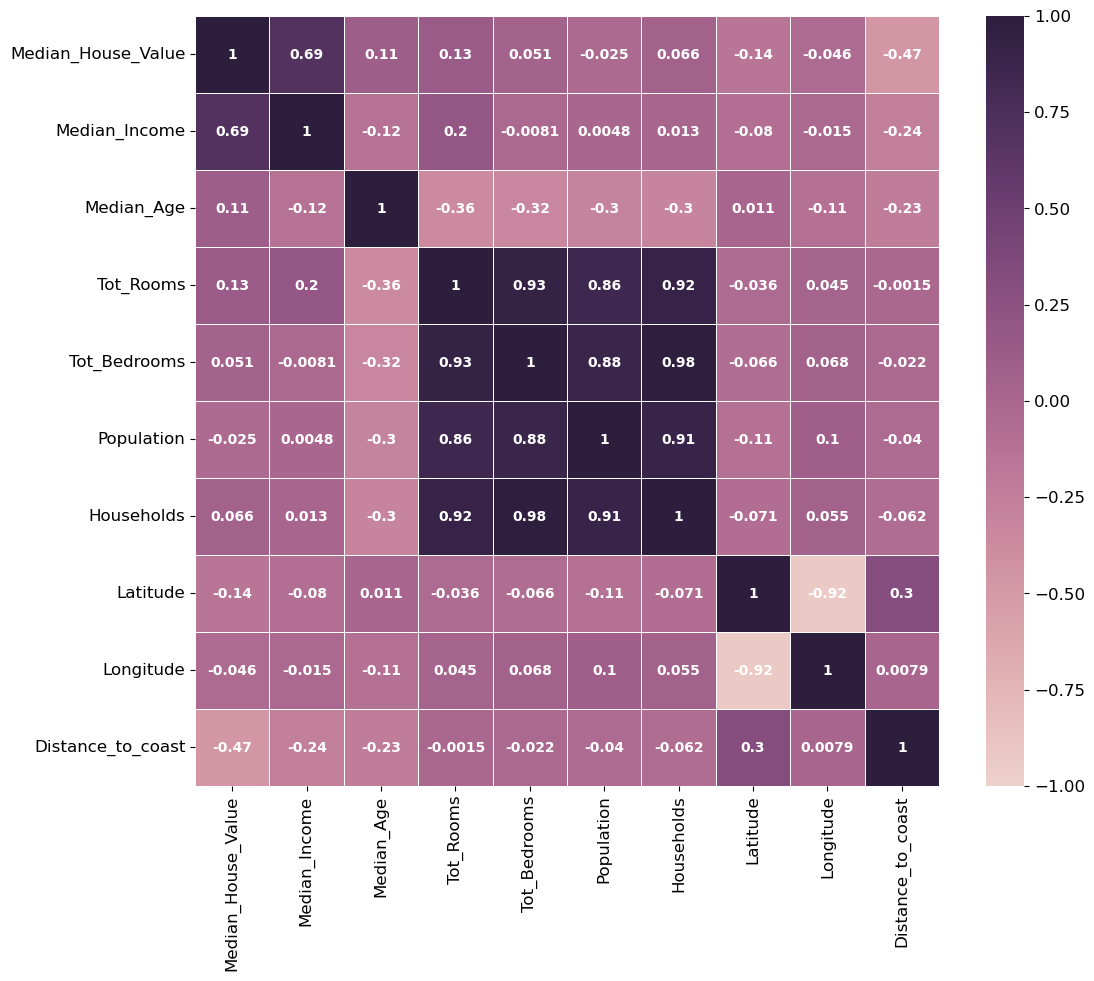

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(houses_cor, vmin=-1, vmax=1, annot=True, center = 0, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={'size':10,'weight':'bold', 'color':'white'}, linewidths=.7)

### *``Your comments here``*

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

In [ ]:
## Your code here ##

**What special observations are you drawing from these scatter plots?** <br>
Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

### *``Your answers here``*

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [44]:
#####################################

## Your lines (cells) of code here ##

#####################################
def find_nearest_destination(row):
    # distances = row[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
    # nearest_destination = distances.idxmin()
    room_per_house = row['Tot_Rooms'] / row['Households']
    bedroom_per_room = row['Tot_Bedrooms'] / row['Tot_Rooms']
    people_per_household = row['Population'] / row['Households']
    return room_per_house, bedroom_per_room, people_per_household

houses_df[['room_per_house', 'bedroom_per_room', 'people_per_household']]= houses_df.apply(find_nearest_destination, axis=1, result_type = 'expand')
houses_df

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Closest_city income_cat  room_per_house  bedroom_per_room  \
0      SanFrancisco          5        6.984127          0.146591   
1      SanFrancisco          5        6.238137          0.155797   
2      SanFrancisco          5        8.288136          0.129516   
3      SanFrancisco          5        5.817352          0.184458   
4      SanFrancisco          3        6.281853          0.172096   
...             ...        ...             ...               ...   
20635  SanFrancisco          1        5.045455          0.224625   
20636  SanFrancisco          2        6.114035          0.215208   
20637  SanFrancisco          1        5.205543          0.215173   
20638  SanFrancisco          1        5.329513          0.219892   
20639  SanFrancisco          2        5.254717          0.221185   

       people_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467  
...                     ...  
20635              2.560606  
20636              3.122807  
20637              2.325635  
20638              2.123209  
20639              2.616981  

[20640 rows x 15 columns]

**Let us again look at the correlation between the predictors and the target**

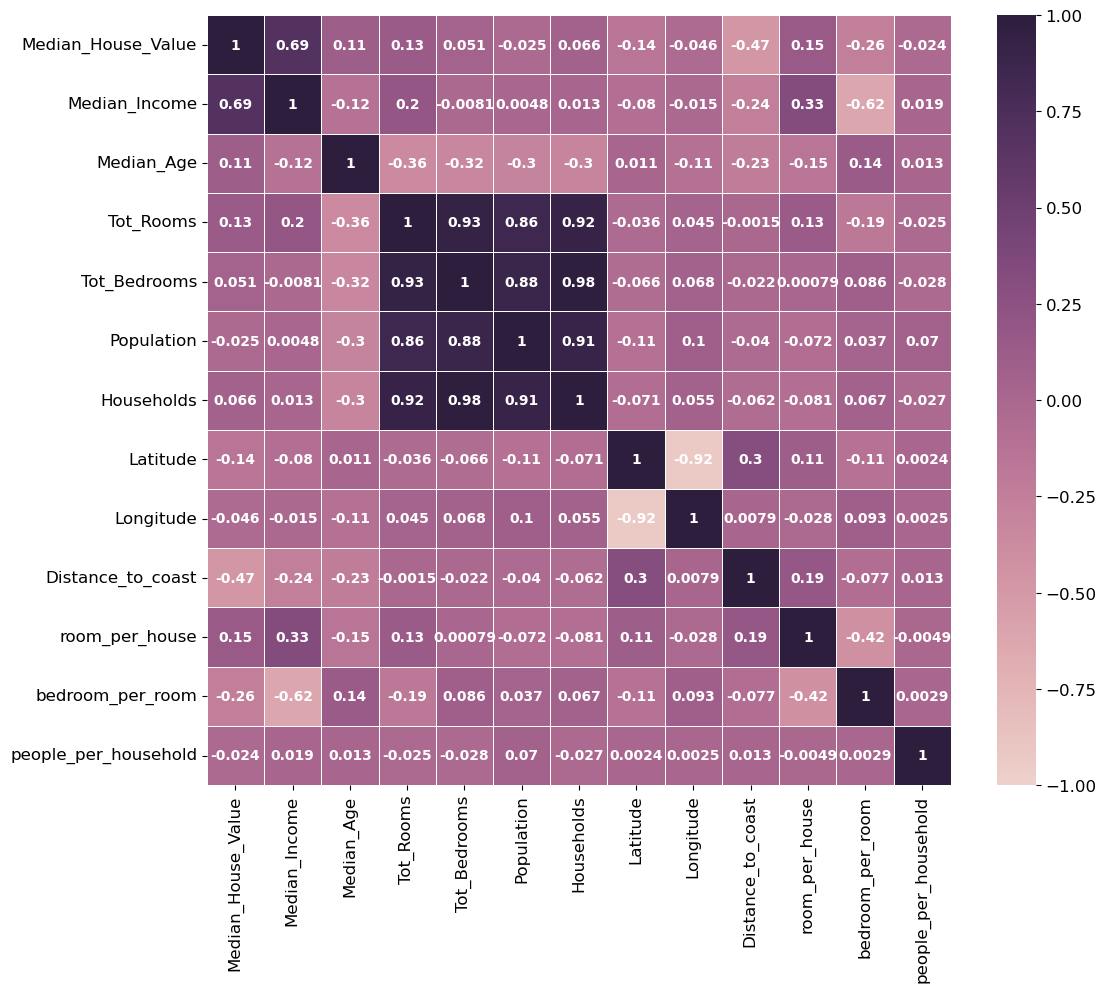

In [45]:
houses_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(houses_df.corr(), vmin=-1, vmax=1, annot=True, center = 0, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={'size':10,'weight':'bold', 'color':'white'}, linewidths=.7);

# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

### *``Comment on each of the following cells``*

In [46]:
## Your comment here ##

import random
random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [47]:
miss

array([15795,   860,  5390, ..., 15313, 15349,  7179])

In [48]:
## Your comment here ##

houses_miss = houses_df.copy()

In [49]:
## Your comment here ##

houses_miss.loc[miss,"Tot_Bedrooms"] = np.nan

In [50]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    20640 non-null  float64 
 1   Median_Income         20640 non-null  float64 
 2   Median_Age            20640 non-null  int64   
 3   Tot_Rooms             20640 non-null  int64   
 4   Tot_Bedrooms          19060 non-null  float64 
 5   Population            20640 non-null  int64   
 6   Households            20640 non-null  int64   
 7   Latitude              20640 non-null  float64 
 8   Longitude             20640 non-null  float64 
 9   Distance_to_coast     20640 non-null  float64 
 10  Closest_city          20640 non-null  category
 11  income_cat            20640 non-null  category
 12  room_per_house        20640 non-null  float64 
 13  bedroom_per_room      20640 non-null  float64 
 14  people_per_household  20640 non-null  float64 
dtypes:

**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [51]:
## Your comment here ##

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [52]:
## Your comment here ##

houses_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19060 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    19060 non-null  float64 
 1   Median_Income         19060 non-null  float64 
 2   Median_Age            19060 non-null  int64   
 3   Tot_Rooms             19060 non-null  int64   
 4   Tot_Bedrooms          19060 non-null  float64 
 5   Population            19060 non-null  int64   
 6   Households            19060 non-null  int64   
 7   Latitude              19060 non-null  float64 
 8   Longitude             19060 non-null  float64 
 9   Distance_to_coast     19060 non-null  float64 
 10  Closest_city          19060 non-null  category
 11  income_cat            19060 non-null  category
 12  room_per_house        19060 non-null  float64 
 13  bedroom_per_room      19060 non-null  float64 
 14  people_per_household  19060 non-null  float64 
dtypes:

In [53]:
## Your comment here ##

Bed_med = houses_miss["Tot_Bedrooms"].median()
houses_miss["Tot_Bedrooms"].fillna(Bed_med, inplace=True)

In [54]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    20640 non-null  float64 
 1   Median_Income         20640 non-null  float64 
 2   Median_Age            20640 non-null  int64   
 3   Tot_Rooms             20640 non-null  int64   
 4   Tot_Bedrooms          20640 non-null  float64 
 5   Population            20640 non-null  int64   
 6   Households            20640 non-null  int64   
 7   Latitude              20640 non-null  float64 
 8   Longitude             20640 non-null  float64 
 9   Distance_to_coast     20640 non-null  float64 
 10  Closest_city          20640 non-null  category
 11  income_cat            20640 non-null  category
 12  room_per_house        20640 non-null  float64 
 13  bedroom_per_room      20640 non-null  float64 
 14  people_per_household  20640 non-null  float64 
dtypes:

### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [77]:
def col_miss (df, col, max_miss):

    
    import random
    random.seed(42)
    miss_indices = random.sample(df.index.tolist(), max_miss)
    df.loc[miss_indices, col] = np.nan
    
    return df
    '''
    df : a pandas dataframe
    col : the name of the variable column
    max_miss : the maximum number of missing values
    returns a data frame with a random number of missing values on col
    '''

    ########################################
    ## Your lines of code here            ##
    ########################################


In [55]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    20640 non-null  float64 
 1   Median_Income         20640 non-null  float64 
 2   Median_Age            20640 non-null  int64   
 3   Tot_Rooms             20640 non-null  int64   
 4   Tot_Bedrooms          20640 non-null  int64   
 5   Population            20640 non-null  int64   
 6   Households            20640 non-null  int64   
 7   Latitude              20640 non-null  float64 
 8   Longitude             20640 non-null  float64 
 9   Distance_to_coast     20640 non-null  float64 
 10  Closest_city          20640 non-null  category
 11  income_cat            20640 non-null  category
 12  room_per_house        20640 non-null  float64 
 13  bedroom_per_room      20640 non-null  float64 
 14  people_per_household  20640 non-null  float64 
dtypes:

Generate some missing values in the first 10 predictors of \<housing_miss>

In [78]:
for col in range(10):
    col_name = housing_miss.columns[col]
    col_miss(housing_miss, col_name, 1651)

In [79]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    18989 non-null  float64 
 1   Median_Income         18989 non-null  float64 
 2   Median_Age            18989 non-null  float64 
 3   Tot_Rooms             18989 non-null  float64 
 4   Tot_Bedrooms          18989 non-null  float64 
 5   Population            18989 non-null  float64 
 6   Households            18989 non-null  float64 
 7   Latitude              18989 non-null  float64 
 8   Longitude             18989 non-null  float64 
 9   Distance_to_coast     18989 non-null  float64 
 10  Closest_city          20640 non-null  category
 11  income_cat            20640 non-null  category
 12  room_per_house        20640 non-null  float64 
 13  bedroom_per_room      20640 non-null  float64 
 14  people_per_household  20640 non-null  float64 
dtypes:

Now, he have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [82]:
housing_miss.isna().sum()

Median_House_Value      1651
Median_Income           1651
Median_Age              1651
Tot_Rooms               1651
Tot_Bedrooms            1651
Population              1651
Households              1651
Latitude                1651
Longitude               1651
Distance_to_coast       1651
Closest_city               0
income_cat                 0
room_per_house             0
bedroom_per_room           0
people_per_household       0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [83]:
# Start with simple imputer
from sklearn.impute import SimpleImputer

**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [85]:
housing_miss_cat = housing_miss.select_dtypes(include='category')
housing_miss_num = housing_miss.select_dtypes(exclude='category')

In [88]:
# Create a SimpleImputer with the strategy to use the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your DataFrame, this computes the mean for each column
imputer.fit(housing_miss_num)

# Transform your DataFrame by replacing missing values with the mean
housing_imputed = imputer.transform(housing_miss_num)

# The result of the transformation is a NumPy array, so you can convert it back to a DataFrame
import pandas as pd
housing_miss_simple = pd.DataFrame(housing_imputed, columns=housing_miss_num.columns)

# Now, housing_imputed_df contains the imputed data with missing values replaced by the mean


In [ ]:
X_df = pd.DataFrame(X, columns=df.columns)
X_df.info()

**Using KNNImputer, impute missing data in each variable**

In [99]:
from sklearn.impute import KNNImputer
housing_miss_knn = pd.DataFrame(KNNImputer().fit_transform(housing_miss_num), columns=housing_miss_num.columns)

In [ ]:
# houses_miss_knn = pd.concat([houses_miss_knn, housing_miss_cat], axis=0)

In [ ]:
## Your code here ##

### Which imputer is better : SimpleImputer or KNNImputer ?
Please give some arguments

In [91]:
def compare_df(df, df_impute):
    from sklearn.metrics import mean_squared_error as mse
    reg_error = []
    for col in df.columns:
        reg_error.append(mse(df[col],df_impute[col]))
    return reg_error

In [94]:
houses_df_cat = houses_df.select_dtypes(include=['category'])
houses_df_num = houses_df.select_dtypes(exclude=['category'])

In [97]:
mse_mean_simple = np.mean(compare_df(houses_df_num, housing_miss_simple))
mse_mean_simple

93547365.81137732

In [100]:
mse_mean_knn = np.mean(compare_df(houses_df_num, housing_miss_knn))
mse_mean_knn

77900029.93190528

### *``Your answers here``*

## 2.2 - Categorical variables...

In [ ]:
houses_df.info()

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

### *``Your answers here``*

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, both categorical variables should be considered nominal**

### *So, what is one hot encoding ?*

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [ ]:
# Let us select our categorical variables
houses_cat = houses_df[["Closest_city","income_cat"]]

In [ ]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE
onehot = OHE(sparse=False)
houses_onehot = onehot.fit_transform(houses_cat)

In [ ]:
houses_onehot

In [ ]:
onehot.categories_

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [ ]:
# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

Let us start with a custom transformer to be used to add attributes

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
houses_plus = attr_adder.transform(housing_df.values)

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

### *``Your answers here``*

In [ ]:
# Check your answers...

houses_plus_df = pd.DataFrame(houses_plus,
                              columns=list(housing_df.columns)+["rooms_per_household", "population_per_household"],
                              index=housing_df.index)

houses_plus_df.info()

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [ ]:
train = housing_miss[housing_miss.columns[0:12]]
train.info()

In [ ]:
quanti_features = list(train.columns[1:10])
cat_features = ["Closest_city","income_cat"]
train_quanti = train[quanti_features]

In [ ]:
train_quanti.info()

**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # this will add 3 attributes
        ('std_scaler', StandardScaler()),
    ])

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

In [ ]:
houses_quanti

#### Explain the previous cells of codes and what they aim to accomplish

### *``Your answers here``*

**How many features should we have at this step ?** 

In [ ]:
## Justify your answer with a code here ##

### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

houses_ready = full_pipeline.fit_transform(train)

**How many features should we have at this step ? Explain !**

In [ ]:
## Justify your answer with a code here ##

# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [ ]:
y = ## Your code here ##
X = ## Your code here ##

## 3.1 - Learning and evaluating with the training set only

#### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [ ]:
## Your code here ##

Estimate performance with Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
## Your code here ##

In [ ]:
## Print your results (code) ##

#### Decision Tree Regression

In [ ]:
## Your code here ##

Estimate performance with Mean Squared Error and Mean Absolute Error

In [ ]:
## Your code here ##

In [ ]:
## Print your results (code) ##

#### Comment on these first results

### *``Your answers here``*

## 3.2 - Estimating the models with *cross validation*

**Explain what the following function accomplishes**

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### *``Your answers here``*

#### Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

lr_scores = ## Your code here ##
lr_rmse = ## Your code here ##
## Your code here ##

#### Penalized Linear Regression (Elasticnet)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
####################
## Your code here ##
####################

#### Decision Trees

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

### *``Your answers here``*

#### Random Forests

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

#### Support Vector Machines

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

## 3.3 - Tuning the model with Grid Search and Randomized Search

#### Example : Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_grid = {'n_estimators': [30,60,100], 'max_features': [8,10,15]}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example : ElasticNet

In [ ]:
en_grid = {'alpha': np.logspace(-3, 4, 10), 'l1_ratio':np.linspace(0,1,11) }

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cart_grid = {"min_samples_split": range(1,10),"min_samples_leaf": range(1,60)}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

## 3.4 - Final question : how good are our models in predicting unseen data ?

In [ ]:
# Start by checking the structure of the test set (code) #
## Your code here ##

### Prepare your test set to be evaluated on the tuned models

In [ ]:
# Now prepare our test set
## Your code here ##

In [ ]:
# Define your target (outcome) and your predictors #
## Your code here ##

#### Random Forest

In [ ]:
# Estimate the performance of your test set on the best cross-validated Random Forest model #

####################
## Your code here ##
####################

#### ElaticNet

In [ ]:
# Estimate the performance of your test set on the best cross-validated Elasticnet model #

####################
## Your code here ##
####################

#### Decision Tree

In [ ]:
# Estimate the performance of your test set on the best cross-validated Decision Tree model #

####################
## Your code here ##
####################

#### Linear Regression

In [ ]:
# Estimate the performance of your test set on the Linear Regression model #

####################
## Your code here ##
####################

### Machine Learning Conclusion
**In the light of all these information, what have your learned about :**
1. Overfitting
2. Tuning a learner
3. Model performance
4. Else ?
Please write a complete but synthetic essay on your learning experience

### <span style="color:blue">Full Homework to be submitted on session #7</span>